In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data

### Importing Raw data 

In [3]:
# Importing the csv file
data = pd.read_csv('Performance Data.csv')

## Source Code

### Exploratory Data Analysis

In [4]:
data.shape

(13066, 26)

In [5]:
data.columns

Index(['employeeid', 'Gender', 'Age', 'Education', 'Tenure in the company',
       'Prevous Exp in Months', 'Building Team Commitment',
       'Strategic Thinking', 'Leads Decision Making and Delivers Results',
       'Analytical Thinking', 'Customer Relations',
       'Service Quality and Planning', 'Solution Selling',
       'In Market Execution', 'Sales Planning and Forecasting', 'Negotiation ',
       'Actionable Insights', 'Solving Problems', 'Engage', 'Applied Thinking',
       'Change', 'Drive', 'Average Comp Score', 'Competen2y', 'Attried',
       'PerformanceRating'],
      dtype='object')

In [6]:
data.head()

,employeeid,Gender,Age,Education,Tenure in the company,Prevous Exp in Months,Building Team Commitment,Strategic Thinking,Leads Decision Making and Delivers Results,Analytical Thinking,...,Actionable Insights,Solving Problems,Engage,Applied Thinking,Change,Drive,Average Comp Score,Competen2y,Attried,PerformanceRating
0,90000142.0,1,10,Post Graduate,5,3,3.0,2.7,2.7,2.3,...,2.0,2.0,2.0,2.7,2.5,2.7,2.3,2,No,2
1,90007528.0,1,9,Graduate,4,52,3.5,3.0,2.7,2.7,...,3.0,3.5,4.0,2.7,3.5,3.0,3.1,4,No,2
2,11165792.0,2,0,Post Graduate,1,99,3.0,1.7,2.3,1.3,...,2.0,2.0,1.5,2.0,2.5,2.3,2.0,1,Yes,2
3,11166294.0,2,0,Post Graduate,1,78,3.5,2.3,3.3,2.7,...,3.0,2.5,2.0,3.3,2.5,3.7,2.8,3,Yes,2
4,11167265.0,2,0,Post Graduate,1,160,3.5,2.0,2.7,2.0,...,2.5,2.5,2.5,2.3,2.5,2.3,2.3,2,Yes,3


In [7]:
# Looking for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13066 entries, 0 to 13065
Data columns (total 26 columns):
employeeid                                    13065 non-null float64
Gender                                        13066 non-null int64
Age                                           13066 non-null int64
Education                                     13066 non-null object
Tenure in the company                         13066 non-null int64
Prevous Exp in Months                         13066 non-null int64
Building Team Commitment                      13066 non-null float64
Strategic Thinking                            13066 non-null float64
Leads Decision Making and Delivers Results    13066 non-null float64
Analytical Thinking                           13066 non-null float64
Customer Relations                            13066 non-null float64
Service Quality and Planning                  13066 non-null float64
Solution Selling                              13066 non-null float64
In 

## Analysis of Education wise Perfomance

In [8]:
# A new pandas Dataframe is created to analyze Education wise performance as asked.
edu = data.iloc[:,[3,25]].copy()
edu_per = edu.copy()

In [9]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
edu_per.groupby(by='Education')['PerformanceRating'].mean()

Education
Below High School    1.000000
Graduate             2.455869
High School          1.318304
Post Graduate        2.638051
Name: PerformanceRating, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='PerformanceRating'>

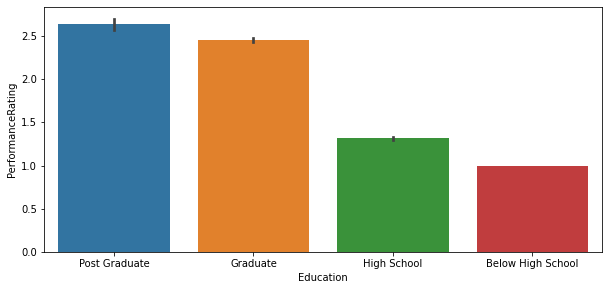

In [10]:
plt.figure(figsize=(10,4.5))
sns.barplot(edu_per['Education'],edu_per['PerformanceRating'])

In [11]:
# Analyze each Education separately
edu_per.groupby(by='Education')['PerformanceRating'].value_counts()

Education          PerformanceRating
Below High School  1                    3637
Graduate           2                    2322
                   3                    1060
                   4                     655
                   1                     404
                   5                      23
High School        1                    2991
                   2                     961
                   3                     108
                   4                      43
Post Graduate      2                     502
                   3                     254
                   5                      84
                   4                      22
Name: PerformanceRating, dtype: int64

In [12]:
# Creating a new dataframe to analyze each Education separately
education = pd.get_dummies(edu_per['Education'])
performance = pd.DataFrame(edu_per['PerformanceRating'])
edu_rating = pd.concat([education,performance],axis=1)

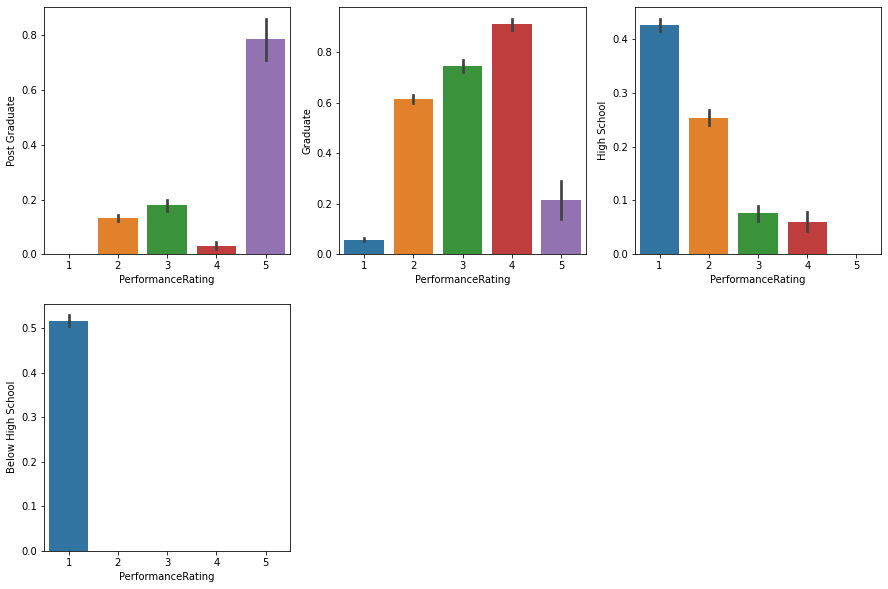

In [13]:
# Plotting a separate bar graph for performance of each Education using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(edu_rating['PerformanceRating'],edu_rating['Post Graduate'])
plt.subplot(2,3,2)
sns.barplot(edu_rating['PerformanceRating'],edu_rating['Graduate'])
plt.subplot(2,3,3)
sns.barplot(edu_rating['PerformanceRating'],edu_rating['High School'])
plt.subplot(2,3,4)
sns.barplot(edu_rating['PerformanceRating'],edu_rating['Below High School'])
plt.show()

### Data Processing/ Data Munging

In [25]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
data["Education"]= enc.fit_transform(data.Education)
data["Attried"]= enc.fit_transform(data.Attried)
#for i in (3): data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

,Gender,Age,Education,Tenure in the company,Prevous Exp in Months,Building Team Commitment,Strategic Thinking,Leads Decision Making and Delivers Results,Analytical Thinking,Customer Relations,...,Actionable Insights,Solving Problems,Engage,Applied Thinking,Change,Drive,Average Comp Score,Competen2y,Attried,PerformanceRating
0,1,10,3,5,3,3.0,2.7,2.7,2.3,2.5,...,2.0,2.0,2.0,2.7,2.5,2.7,2.3,2,0,2
1,1,9,1,4,52,3.5,3.0,2.7,2.7,4.0,...,3.0,3.5,4.0,2.7,3.5,3.0,3.1,4,0,2
2,2,0,3,1,99,3.0,1.7,2.3,1.3,2.5,...,2.0,2.0,1.5,2.0,2.5,2.3,2.0,1,1,2
3,2,0,3,1,78,3.5,2.3,3.3,2.7,3.5,...,3.0,2.5,2.0,3.3,2.5,3.7,2.8,3,1,2
4,2,0,3,1,160,3.5,2.0,2.7,2.0,3.0,...,2.5,2.5,2.5,2.3,2.5,2.3,2.3,2,1,3


## Feature Selection    
-     There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Education, and skills. These were selected because their correlation coeffecient with Performance Rating was more than 0.1. 
-     Standardization and Label Encoding was also used for feature transformation.
-     A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy. Similarly, Principal Component Analysis also reduces the accuracy.

In [26]:
# Finding out the correlation coeffecient to find out which predictors are significant.
data.corr()

,Gender,Age,Education,Tenure in the company,Prevous Exp in Months,Building Team Commitment,Strategic Thinking,Leads Decision Making and Delivers Results,Analytical Thinking,Customer Relations,...,Actionable Insights,Solving Problems,Engage,Applied Thinking,Change,Drive,Average Comp Score,Competen2y,Attried,PerformanceRating
Gender,1.000000,0.060305,-0.121211,0.079332,0.089445,0.032261,0.014025,0.015808,0.010326,0.001214,...,0.002855,0.015859,0.043479,-0.006645,0.021609,0.003832,0.020035,0.024373,-0.042290,0.030435
Age,0.060305,1.000000,0.162977,0.955276,0.074090,0.163952,-0.012536,0.125988,0.031169,0.006406,...,0.018370,0.115088,0.200630,0.006322,-0.001053,0.033657,0.049341,0.061902,-0.495507,0.405198
Education,-0.121211,0.162977,1.000000,0.138014,0.124691,0.020936,-0.001130,0.021802,0.003491,0.006160,...,0.013200,0.021736,0.034012,0.007370,0.003048,0.005290,0.013325,0.010924,-0.068740,0.235211
Tenure in the company,0.079332,0.955276,0.138014,1.000000,0.063290,0.179425,-0.007735,0.132238,0.032446,0.004599,...,0.019194,0.123048,0.210845,0.006339,0.001478,0.036407,0.055026,0.066871,-0.470894,0.392017
Prevous Exp in Months,0.089445,0.074090,0.124691,0.063290,1.000000,0.031758,0.000446,0.020794,0.001857,0.004983,...,0.011739,0.025838,0.026829,0.000633,0.016822,0.018337,0.019741,0.020762,-0.032055,0.487015
Building Team Commitment,0.032261,0.163952,0.020936,0.179425,0.031758,1.000000,0.416196,0.532291,0.425430,0.278175,...,0.248994,0.436512,0.403378,0.372249,0.398151,0.448232,0.572410,0.531791,-0.030202,0.079682
Strategic Thinking,0.014025,-0.012536,-0.001130,-0.007735,0.000446,0.416196,1.000000,0.570092,0.744317,0.404718,...,0.355158,0.477033,0.289309,0.592028,0.269575,0.527855,0.711600,0.638235,0.012492,-0.003861
Leads Decision Making and Delivers Results,0.015808,0.125988,0.021802,0.132238,0.020794,0.532291,0.570092,1.000000,0.581862,0.333659,...,0.272826,0.374673,0.448443,0.706085,0.444624,0.645229,0.763409,0.698642,-0.030519,0.064957
Analytical Thinking,0.010326,0.031169,0.003491,0.032446,0.001857,0.425430,0.744317,0.581862,1.000000,0.449596,...,0.414957,0.537505,0.398892,0.722579,0.418235,0.531818,0.751999,0.677512,0.005383,0.013866
Customer Relations,0.001214,0.006406,0.006160,0.004599,0.004983,0.278175,0.404718,0.333659,0.449596,1.000000,...,0.619309,0.337564,0.358097,0.385486,0.458313,0.477527,0.689336,0.648705,0.013513,0.015235


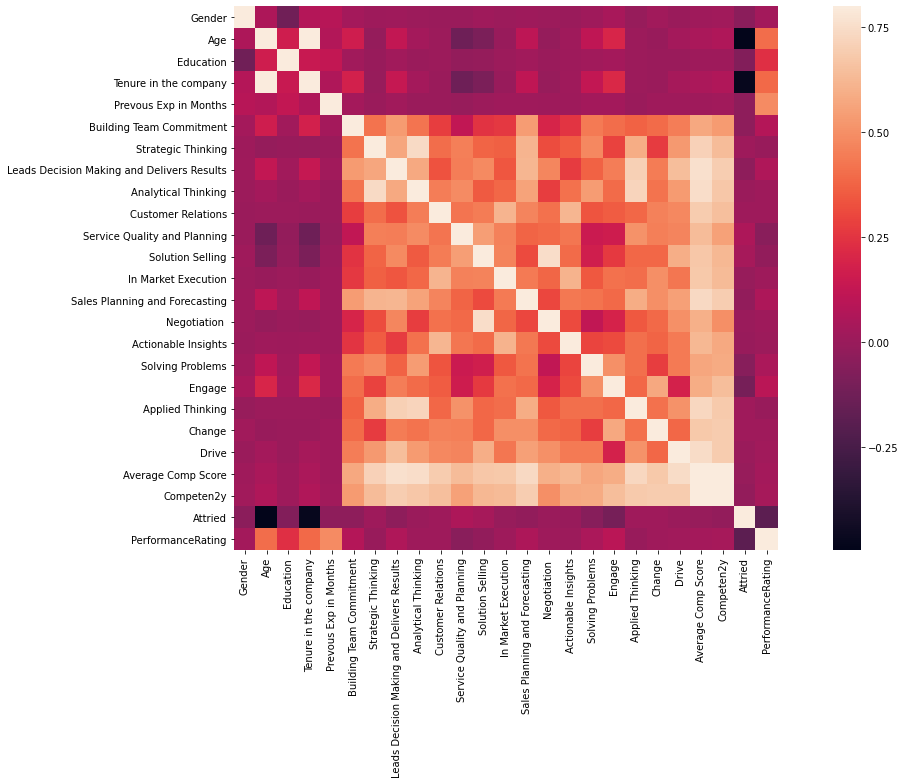

In [27]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

In [30]:
# Dropping the first columns as it is of no use for analysis.
#data.drop(['employeeid'],inplace=True,axis=1)

In [31]:
data.head()

,Gender,Age,Education,Tenure in the company,Prevous Exp in Months,Building Team Commitment,Strategic Thinking,Leads Decision Making and Delivers Results,Analytical Thinking,Customer Relations,...,Actionable Insights,Solving Problems,Engage,Applied Thinking,Change,Drive,Average Comp Score,Competen2y,Attried,PerformanceRating
0,1,10,3,5,3,3.0,2.7,2.7,2.3,2.5,...,2.0,2.0,2.0,2.7,2.5,2.7,2.3,2,0,2
1,1,9,1,4,52,3.5,3.0,2.7,2.7,4.0,...,3.0,3.5,4.0,2.7,3.5,3.0,3.1,4,0,2
2,2,0,3,1,99,3.0,1.7,2.3,1.3,2.5,...,2.0,2.0,1.5,2.0,2.5,2.3,2.0,1,1,2
3,2,0,3,1,78,3.5,2.3,3.3,2.7,3.5,...,3.0,2.5,2.0,3.3,2.5,3.7,2.8,3,1,2
4,2,0,3,1,160,3.5,2.0,2.7,2.0,3.0,...,2.5,2.5,2.5,2.3,2.5,2.3,2.3,2,1,3


In [32]:
# Here we have selected only the important columns
y = data.PerformanceRating
X = data.iloc[:,0:-1]  #All predictors were selected it resulted in dropping of accuracy.
#X = data.iloc[:,[2,3,4,5,7,13,16,17]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

,Gender,Age,Education,Tenure in the company,Prevous Exp in Months,Building Team Commitment,Strategic Thinking,Leads Decision Making and Delivers Results,Analytical Thinking,Customer Relations,...,Negotiation,Actionable Insights,Solving Problems,Engage,Applied Thinking,Change,Drive,Average Comp Score,Competen2y,Attried
0,1,10,3,5,3,3.0,2.7,2.7,2.3,2.5,...,2.0,2.0,2.0,2.0,2.7,2.5,2.7,2.3,2,0
1,1,9,1,4,52,3.5,3.0,2.7,2.7,4.0,...,2.0,3.0,3.5,4.0,2.7,3.5,3.0,3.1,4,0
2,2,0,3,1,99,3.0,1.7,2.3,1.3,2.5,...,2.5,2.0,2.0,1.5,2.0,2.5,2.3,2.0,1,1
3,2,0,3,1,78,3.5,2.3,3.3,2.7,3.5,...,1.5,3.0,2.5,2.0,3.3,2.5,3.7,2.8,3,1
4,2,0,3,1,160,3.5,2.0,2.7,2.0,3.0,...,1.0,2.5,2.5,2.5,2.3,2.5,2.3,2.3,2,1


In [33]:
data["Tenure in the company"].unique()

array([5, 4, 1, 2, 3], dtype=int64)

In [34]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [35]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
X_train.shape

(9146, 24)

In [37]:
X_test.shape

(3920, 24)

#### PCA was used, it resulted in decline of accuracy.
    from sklearn.decomposition import PCA
    pca=PCA(n_components=None)
    X_train=pca.fit_transform(X_train)
    X_test=pca.transform(X_test)
    pca.explained_variance_ratio_

## Models

-     In the section below, we used algorithms like Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbor, XGBoost Classifier and Artificial Neural Network to calculate the accuracy and found out that Random Forest with GridSearchCV gives the maximum accuracy of 93%.

## 1. Logistic Regression

In [38]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [40]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.6346938775510204
              precision    recall  f1-score   support

           1       0.70      0.91      0.79      2119
           2       0.47      0.43      0.45      1161
           3       0.00      0.00      0.00       400
           4       0.53      0.23      0.33       205
           5       0.67      0.06      0.11        35

   micro avg       0.63      0.63      0.63      3920
   macro avg       0.47      0.33      0.34      3920
weighted avg       0.55      0.63      0.58      3920



In [41]:
confusion_matrix(y_test,y_predict_log)

array([[1933,  181,    0,    5,    0],
       [ 641,  505,    1,   14,    0],
       [ 150,  231,    0,   19,    0],
       [  33,  122,    1,   48,    1],
       [   4,   25,    0,    4,    2]], dtype=int64)

## 2. Support Vector Machine

In [42]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [43]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [44]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.7397959183673469
              precision    recall  f1-score   support

           1       0.89      0.91      0.90      2119
           2       0.63      0.69      0.65      1161
           3       0.33      0.25      0.29       400
           4       0.44      0.34      0.38       205
           5       0.31      0.11      0.17        35

   micro avg       0.74      0.74      0.74      3920
   macro avg       0.52      0.46      0.48      3920
weighted avg       0.72      0.74      0.73      3920



In [45]:
confusion_matrix(y_test,y_predict_svm)

array([[1930,  159,   23,    7,    0],
       [ 212,  796,  114,   37,    2],
       [  24,  230,  100,   43,    3],
       [   6,   74,   51,   70,    4],
       [   3,   14,   12,    2,    4]], dtype=int64)

## 3. Decision Tree with GridSearchCV

In [46]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'min_samples_split': [2, 3, 4, 5], 'criterion': ['gini']}, {'min_samples_split': [2, 3, 4, 5], 'criterion': ['entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [47]:
model_griddtree.best_params_

{'criterion': 'gini', 'min_samples_split': 4}

In [48]:
# Predicting the model
y_predict_dtree = model_griddtree.predict(X_test)

In [49]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.700765306122449
              precision    recall  f1-score   support

           1       0.87      0.90      0.88      2119
           2       0.60      0.57      0.58      1161
           3       0.27      0.29      0.28       400
           4       0.33      0.28      0.30       205
           5       0.38      0.23      0.29        35

   micro avg       0.70      0.70      0.70      3920
   macro avg       0.49      0.45      0.47      3920
weighted avg       0.70      0.70      0.70      3920



In [50]:
confusion_matrix(y_test,y_predict_dtree)

array([[1906,  170,   33,   10,    0],
       [ 231,  658,  218,   50,    4],
       [  43,  181,  117,   55,    4],
       [  11,   75,   56,   58,    5],
       [   0,   13,    9,    5,    8]], dtype=int64)

## 4. Random Forest with GridSearchCV

In [51]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=None,
            oob_score=False, random_state=33, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'min_samples_split': [2, 3, 4, 5], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [52]:
model_gridrf.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 5}

In [53]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [54]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.7448979591836735
              precision    recall  f1-score   support

           1       0.90      0.91      0.91      2119
           2       0.61      0.71      0.66      1161
           3       0.34      0.22      0.27       400
           4       0.46      0.36      0.40       205
           5       0.33      0.06      0.10        35

   micro avg       0.74      0.74      0.74      3920
   macro avg       0.53      0.45      0.47      3920
weighted avg       0.73      0.74      0.73      3920



In [55]:
confusion_matrix(y_test,y_predict_rf)

array([[1935,  172,    9,    3,    0],
       [ 193,  821,  104,   43,    0],
       [  19,  251,   88,   38,    4],
       [   7,   79,   45,   74,    0],
       [   1,   14,   14,    4,    2]], dtype=int64)

## 5. Naive Bayes Bernoulli

In [56]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [57]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [58]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

0.6071428571428571
              precision    recall  f1-score   support

           1       0.68      0.85      0.76      2119
           2       0.47      0.46      0.46      1161
           3       0.00      0.00      0.00       400
           4       0.32      0.20      0.24       205
           5       0.00      0.00      0.00        35

   micro avg       0.61      0.61      0.61      3920
   macro avg       0.29      0.30      0.29      3920
weighted avg       0.52      0.61      0.56      3920



In [59]:
confusion_matrix(y_test,y_predict_nb)

array([[1802,  304,    0,   13,    0],
       [ 572,  538,    3,   48,    0],
       [ 179,  197,    0,   24,    0],
       [  67,   96,    2,   40,    0],
       [  14,   20,    0,    1,    0]], dtype=int64)

## 6. K-Nearest Neighbor

In [60]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [61]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [62]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.6612244897959184
              precision    recall  f1-score   support

           1       0.74      0.92      0.82      2119
           2       0.54      0.48      0.51      1161
           3       0.30      0.11      0.16       400
           4       0.40      0.16      0.22       205
           5       1.00      0.03      0.06        35

   micro avg       0.66      0.66      0.66      3920
   macro avg       0.59      0.34      0.35      3920
weighted avg       0.62      0.66      0.62      3920



In [63]:
confusion_matrix(y_test,y_predict_knn)

array([[1960,  145,   11,    3,    0],
       [ 534,  554,   48,   25,    0],
       [ 129,  209,   45,   17,    0],
       [  34,   95,   44,   32,    0],
       [   7,   20,    4,    3,    1]], dtype=int64)

## 7. XGBoost Classifier

In [64]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [65]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [66]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.7709183673469387
              precision    recall  f1-score   support

           1       0.92      0.92      0.92      2119
           2       0.63      0.81      0.71      1161
           3       0.38      0.07      0.12       400
           4       0.48      0.48      0.48       205
           5       0.47      0.26      0.33        35

   micro avg       0.77      0.77      0.77      3920
   macro avg       0.57      0.51      0.51      3920
weighted avg       0.75      0.77      0.75      3920



In [67]:
confusion_matrix(y_test,y_predict_xgb)

array([[1946,  168,    0,    5,    0],
       [ 155,  939,   28,   38,    1],
       [  15,  290,   30,   60,    5],
       [   2,   83,   18,   98,    4],
       [   0,   17,    4,    5,    9]], dtype=int64)

## 8. Artificial Neural Network

In [68]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.01, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [69]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [70]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.7622448979591837
              precision    recall  f1-score   support

           1       0.93      0.90      0.92      2119
           2       0.63      0.77      0.70      1161
           3       0.36      0.24      0.28       400
           4       0.47      0.36      0.41       205
           5       0.50      0.20      0.29        35

   micro avg       0.76      0.76      0.76      3920
   macro avg       0.58      0.49      0.52      3920
weighted avg       0.75      0.76      0.75      3920



In [71]:
confusion_matrix(y_test,y_predict_mlp)

array([[1915,  195,    7,    2,    0],
       [ 134,  897,   95,   34,    1],
       [  11,  247,   95,   43,    4],
       [   2,   67,   60,   74,    2],
       [   0,   14,   10,    4,    7]], dtype=int64)

In [80]:
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [81]:
X_train.shape
#y_train.shape

(9146, 8, 1)

In [82]:
X_train = np.expand_dims(np.random.normal(size=(9146, 8)),axis=-1)

y_train = np.random.choice([0,1], size=(9146,8))


n_timesteps, n_features, n_outputs =X_train.shape[0], X_train.shape[1], y_train.shape[1]

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, 
activation='relu',input_shape=(n_features,1)))

model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X_train, y_train, epochs=15, batch_size=100, verbose=1)

Epoch 1/15
9146/9146 [==============================] - 2s 196us/step - loss: 8.3219 - acc: 0.1183
Epoch 2/15
9146/9146 [==============================] - 1s 84us/step - loss: 8.3146 - acc: 0.1547
Epoch 3/15
9146/9146 [==============================] - ETA: 0s - loss: 8.3126 - acc: 0.113 - 1s 89us/step - loss: 8.3135 - acc: 0.1137
Epoch 4/15
9146/9146 [==============================] - 1s 81us/step - loss: 8.3139 - acc: 0.1538
Epoch 5/15
9146/9146 [==============================] - 1s 80us/step - loss: 8.3134 - acc: 0.1385
Epoch 6/15
9146/9146 [==============================] - 1s 84us/step - loss: 8.3133 - acc: 0.1279
Epoch 7/15
9146/9146 [==============================] - 1s 84us/step - loss: 8.3130 - acc: 0.1357
Epoch 8/15
9146/9146 [==============================] - 1s 84us/step - loss: 8.3133 - acc: 0.2117
Epoch 9/15
9146/9146 [==============================] - 1s 75us/step - loss: 8.3131 - acc: 0.1299
Epoch 10/15
9146/9146 [==============================] - 1s 93us/step - loss: 8

In [76]:
y_test.shape

(3920,)

In [77]:
# Predicting the model
X_test = np.expand_dims(np.random.normal(size=(3920, 8)),axis=-1)
Predictions = model.predict(X_test,batch_size =100)

In [78]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import label_ranking_average_precision_score
y_test = np.random.choice([0,1], size=(3920,8))
print(label_ranking_average_precision_score(y_test,Predictions))
#print(accuracy_score(y_test,Predictions))
#print(classification_report(y_test,Predictions))

0.6251126903142213


### Stack Algorithm

In [ ]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(10)

In [ ]:
dt_train=dt_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [ ]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [ ]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
stk_sore= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [83]:
# Exporting the trained model
from sklearn.externals import joblib
joblib.dump(model_gridrf,'RFwithGS.ml')

['RFwithGS.ml']

In [79]:
# Exporting the trained model
from sklearn.externals import joblib
joblib.dump(model_xgb,'XGB.ml')

['XGB.ml']